# Heart Disease Prediction

This notebook uses various machine learning and data science techniques & libraries to attempt to predict heart disease based on medical attributes

## Problem Definition
> Given clinical parameters about a patient, predict whether that patient has heart disease or not.

## Data
Original data came from Cleveland Dataset at UCI Machine Learning Repository.\
https://archive.ics.uci.edu/dataset/45/heart+disease

## Evaluation
> Reach 95% accuracy at predicting whether or not a patient has heart disease

## Data Understanding

### Features

- age : Patient's age in years
- sex : Gender of patient
    - 0 : female
    - 1 : male
- cp : Chest pain type
    - 0 : Typical angina
    - 1 : Atypical angina
    - 2 : Non-anginal pain
    - 3 : Asymptomatic 
- trestbps : Resting blood pressure (in mmHg on admission to hospital).
- chol : Serum cholestoral (in mg/dL)
- fbs : Fasting blood sugar > 120 mg/dL
    - 0 : false
    - 1 : true
- restecg : Resting electrocardiograph results
    - 0 : Nothing
    - 1 : ST-T Wave Abnormality
    - 2 : Probable or definite left ventricular hypertrophy
- thalach : Maximum heart rate achieved
- exang : Exercise-induced angina
    - 0 : no
    - 1 : yes
- oldpeak : ST depression induced by exercise relative to rest
- slope : Slope of the peak exercise ST segment
    - 1 : upsloping
    - 2 : flat
    - 3 : downsloping
- ca : Number of major vessels colored by flourosopy (0 - 4)
- thal : Thalassemia
    - 3 : Normal
    - 6 : Fixed defect
    - 7 : Reversable defect
- target : Patient have disease or not
    - 0 : no
    - 1 : yes

## Tools Preparation

In [1]:
# EDA (Exploratory data analysis) Tools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

## Data Load

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
df.shape

(303, 14)

## Exploratory Data Analysis

In [4]:
# Finding out how many of each class in dataset
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

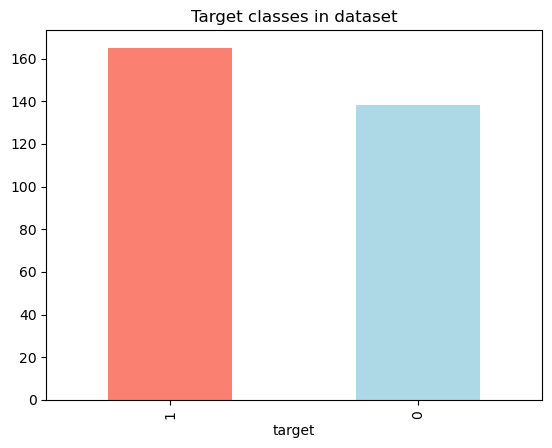

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Target classes in dataset");

In [6]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Basic Data Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency based on Sex Attribute

In [8]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


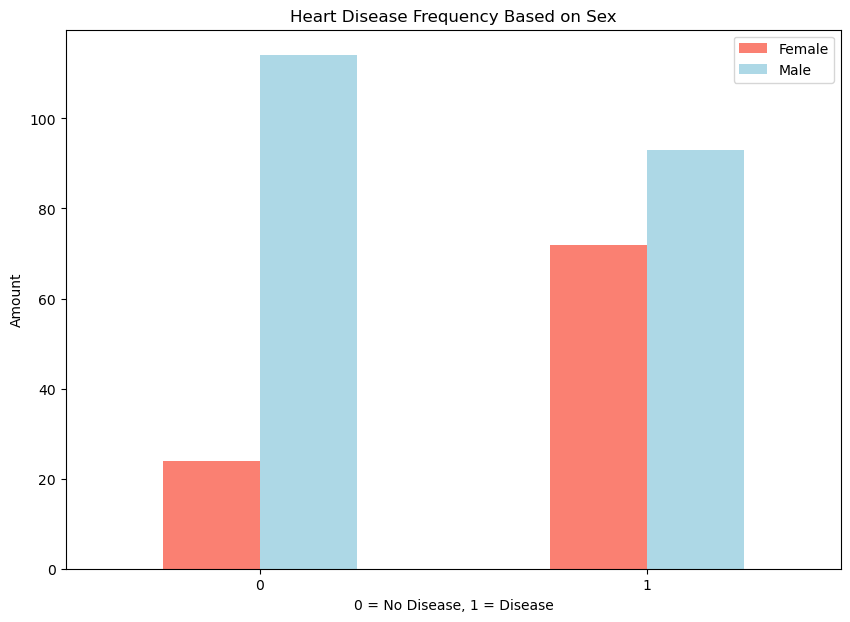

In [10]:
# Plot of the crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10, 7), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Based on Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

Based on the data, it can be seen that,
- ~75% of female has heart disease
- Female has bigger ratio of heart disease to no heart disease than male

### Compare Age vs Max Heart Rate for Heart Disease

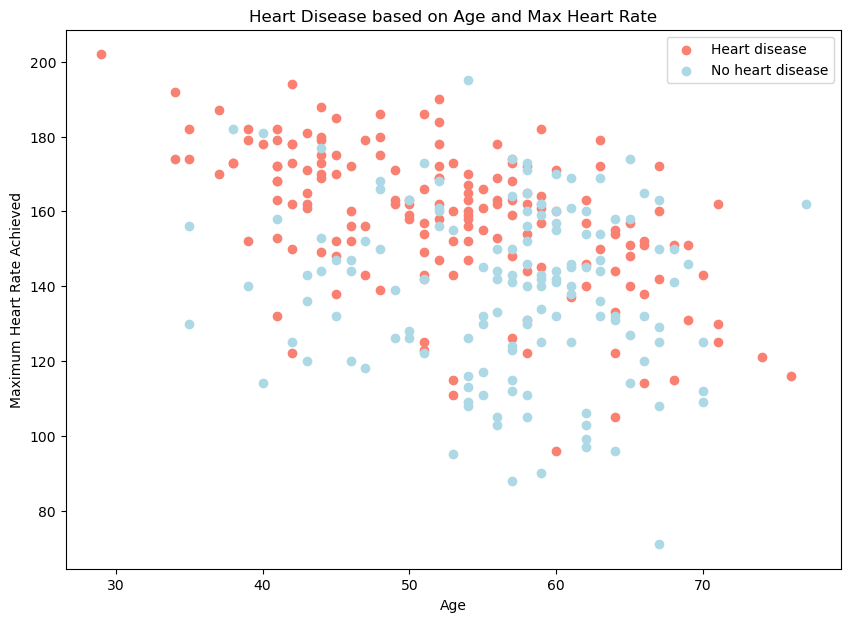

In [11]:
plt.figure(figsize=(10,7))

# Scatter plot with positive examples
plt.scatter(df["age"][df["target"] == 1],
            df["thalach"][df["target"] == 1],
            c = "salmon"
           )

# Scatter plot with negative examples
plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            c = "lightblue"
           )

plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.legend(["Heart disease", "No heart disease"])
plt.title("Heart Disease based on Age and Max Heart Rate");

There's a downwards trend between age and max. heart rate

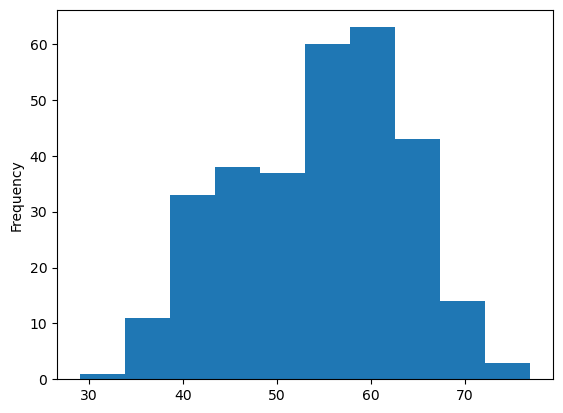

In [12]:
# Distribution of age columns
df["age"].plot.hist();

### Compare Chest Pain Types to Target
- cp : Chest pain type
    - 0 : Typical angina
    - 1 : Atypical angina
    - 2 : Non-anginal pain
    - 3 : Asymptomatic 

In [13]:
# Crosstab
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


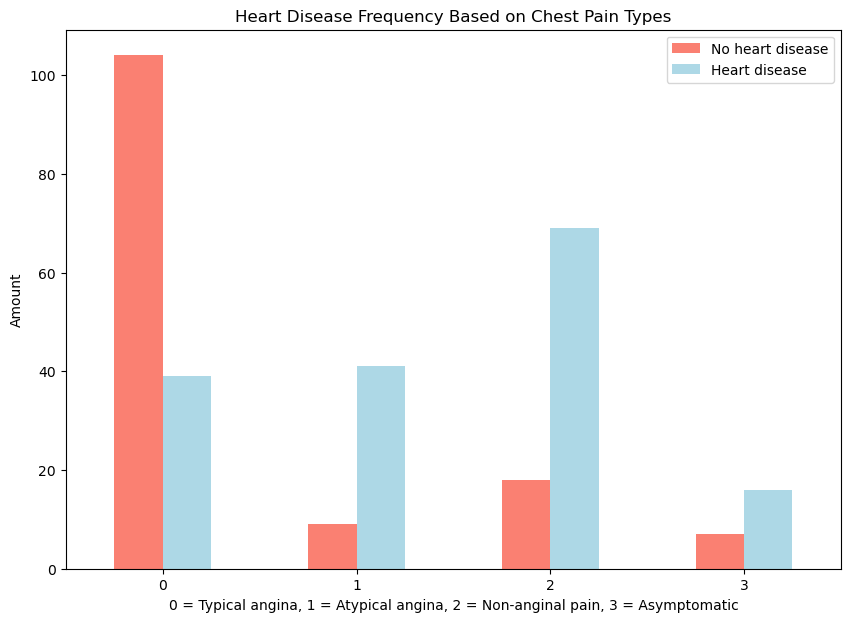

In [14]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", figsize=(10, 7), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Based on Chest Pain Types")
plt.xlabel("0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic")
plt.ylabel("Amount")
plt.legend(["No heart disease", "Heart disease"])
plt.xticks(rotation=0);

### Correlation Matrix

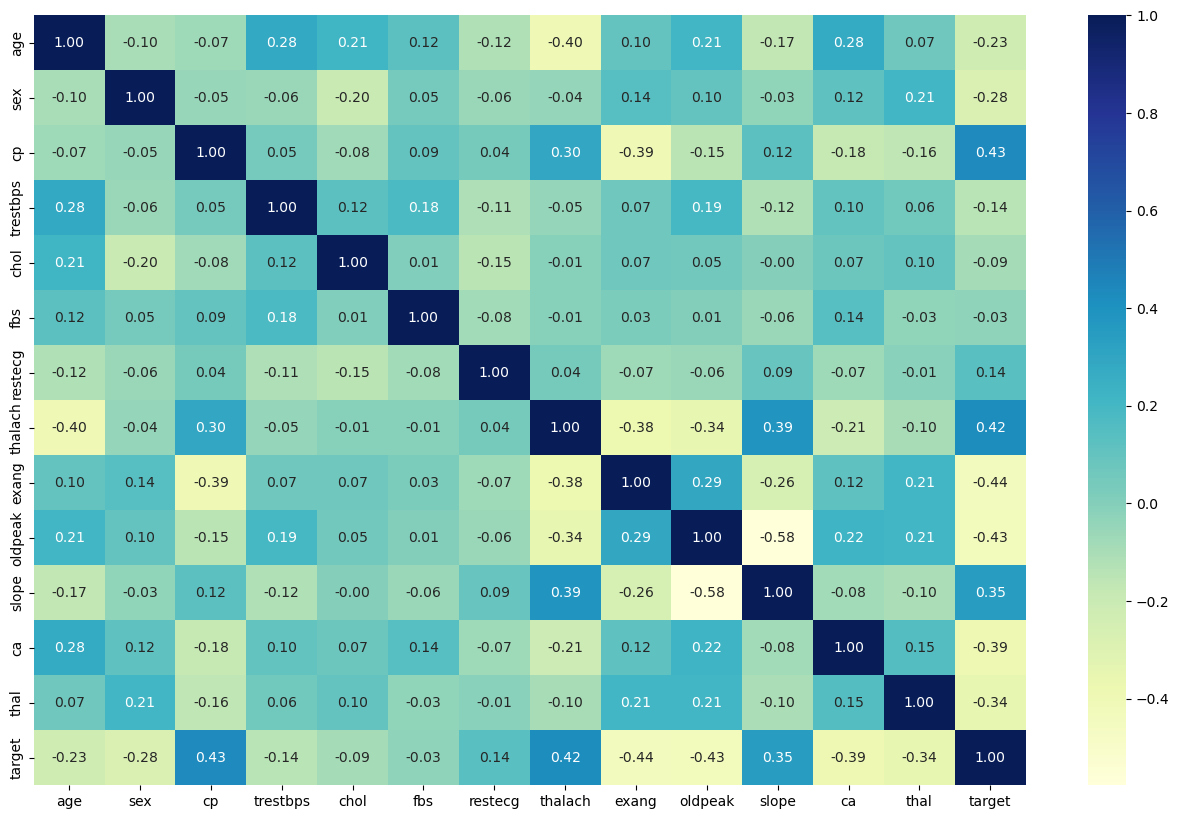

In [15]:
# Making heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

Features that looks correlated to target:
- Positive correlation : cp, thalach, slope
- Negative corrletion : age, sex, exang, oldpeak, ca, thal

## Machine Learning Modelling

In [16]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Data Split

In [17]:
# Split data into X, Y
X = df.drop("target", axis=1)
y = df["target"]

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Split data into training and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [22]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Baseline Models

In [23]:
# Put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Function for fitting and scoring models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Random seed
    np.random.seed(42)
    
    # Dictionary of model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate the model and append the model's score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [24]:
model_scores = fit_and_score(models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [25]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Gradient Boosting': 0.7704918032786885}

### Baseline Model Comparison

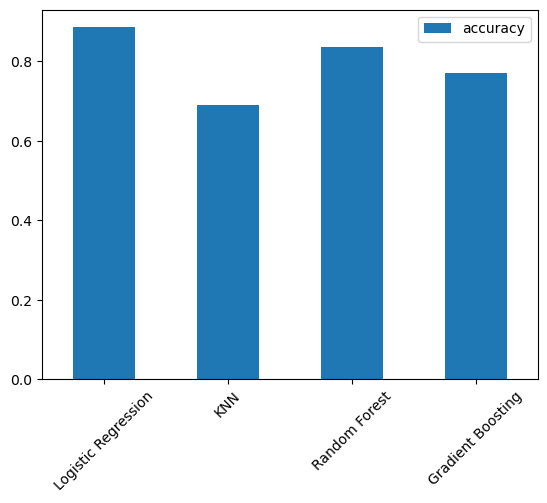

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=45);

### Hyperparameter Tuning (KNN)

In [27]:
# Tune KNN
train_scores = []
test_scores = []

# Different values for n_neighbors
neighbors = range(1, 25)

knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the model
    knn.fit(X_train, y_train)

    # Update the training and test scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on test data: 75.41 %


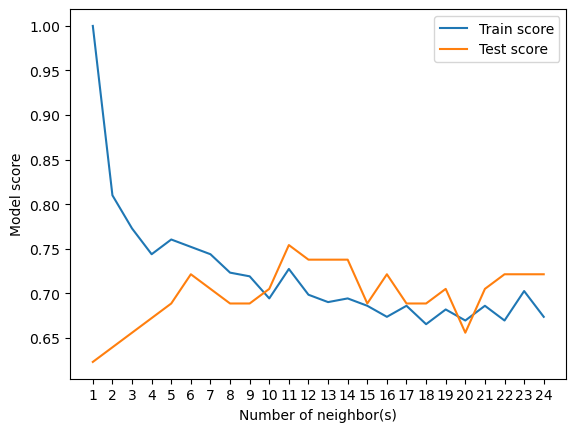

In [28]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score");
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Number of neighbor(s)")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f} %")

KNN is still worse than other models

## Hyperparameter Tuning with RandomizedSearchCV

In [29]:
# Hyperparameter grid for Logistic Regression
logreg_grid_params = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["lbfgs", "liblinear", "newton-cg"]
}

# Hyperparameter grid for Random Forest Classifier
random_forest_grid_params = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Hyperparameter grid for GradientBoosting Classfier
gb_grid_params = {
    "n_estimators": np.arange(50, 500, 50),
    "learning_rate": [0.0001, 0.01, 0.1],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 10, 2)
}

In [30]:
np.random.seed(42)
# Tune Logistic Regression

rs_logreg = RandomizedSearchCV(LogisticRegression(), param_distributions=logreg_grid_params,
                               cv=5, n_jobs=-1, random_state=42, n_iter=60, verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=60, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg']},
                   random_state=42, verbose=True)

In [31]:
# Check best parameters
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
# Model score on test data
rs_logreg.score(X_test, y_test)

0.8852459016393442

In [33]:
# Tune Random Forest Classifier
np.random.seed(42)

rs_random_forest = RandomizedSearchCV(RandomForestClassifier(), param_distributions=random_forest_grid_params,
                               cv=5, n_jobs=-1, random_state=42, n_iter=200, verbose=True)

# Fit random hyperparameter search model for Random Forest Classifier
rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=True)

In [34]:
# Check for best parameters
rs_random_forest.best_params_

{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [35]:
# Model Score on test data
rs_random_forest.score(X_test, y_test)

0.8688524590163934

In [36]:
# Tune GradientBoosting Classifier
np.random.seed(42)

rs_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=gb_grid_params,
                               cv=5, n_jobs=-1, random_state=42, n_iter=300, verbose=True)

# Fit random hyperparameter search model for Random Forest Classifier
rs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.01, 0.1],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, verbose=True)

In [37]:
# Check for best parameters
rs_gb.best_params_

{'n_estimators': 150,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'learning_rate': 0.01}

In [38]:
# Model Score on test data
rs_gb.score(X_test, y_test)

0.8032786885245902

Based on the tuning of those 3 models, the best were LogisticRegression.\
So, do hyperparameter tuning with GridSearchCV for LogisticRegression to improve the model more

## Hyperparameter Tuning with GridSearchCV

In [39]:
# Hyperparameter grid for Logistic regression
log_reg_grid = {
    "C": np.logspace(-10, 10, 100),
    "solver": ["lbfgs", "liblinear", "newton-cg"]
}

# Grid Search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(max_iter=300), param_grid=log_reg_grid,
                               cv=5, n_jobs=-1, verbose=True)

# Fit the GridSearch
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [40]:
# Check for best parameters
gs_log_reg.best_params_

{'C': 0.19630406500402683, 'solver': 'liblinear'}

In [41]:
# Model score
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation of Tuned Classifier Models

In [42]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

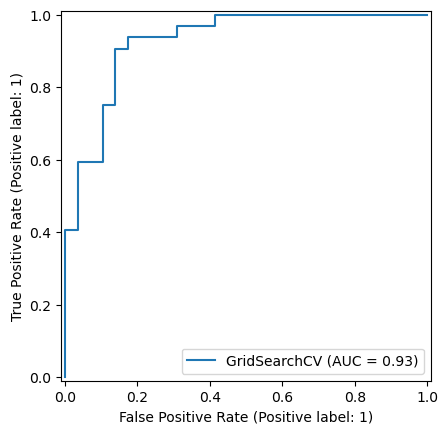

In [43]:
# ROC Curve
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

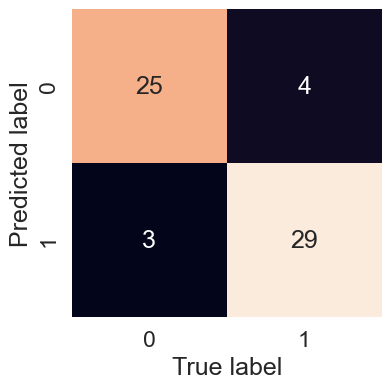

In [44]:
# Confusion matrix
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_matrix(y_test, y_preds)

### Classification Report using 5-fold CV

In [45]:
# Best 2 model according to hyperparameter tuning
clf = LogisticRegression(C=0.19630406500402683, solver="liblinear")
clf2 = RandomForestClassifier(n_estimators=360, min_samples_split=14, min_samples_leaf=5, max_depth=5, n_jobs=-1,)

# Cross validation metrics function
def calculate_cv_metrics(clf, scoring):
    cv_metric = cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=-1, scoring=scoring)
    return np.mean(cv_metric)

In [46]:
# Cross validated accuracy
cv_acc = [calculate_cv_metrics(clf, "accuracy"), calculate_cv_metrics(clf2, "accuracy")]
cv_acc

[0.8446994535519124, 0.8216939890710384]

In [47]:
# Cross validated precision
cv_precision = [calculate_cv_metrics(clf, "precision"), calculate_cv_metrics(clf2, "precision")]
cv_precision

[0.8207936507936507, 0.8323755411255412]

In [48]:
# Cross validated recall
cv_recall = [calculate_cv_metrics(clf, "recall"), calculate_cv_metrics(clf2, "recall")]
cv_recall

[0.9212121212121213, 0.8787878787878787]

In [49]:
# Cross validated f1-score
cv_f1 = [calculate_cv_metrics(clf, "f1"), calculate_cv_metrics(clf2, "f1")]
cv_f1

[0.8673007976269721, 0.8512699426220058]

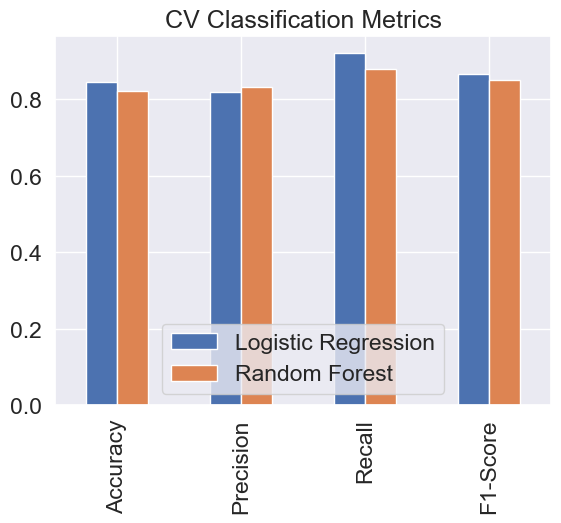

In [50]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1-Score": cv_f1}, index=["Logistic Regression", "Random Forest"])
cv_metrics.T.plot(kind="bar", title="CV Classification Metrics");

Overall, Logistic Regression performs better than Random Forest

## Feature Importance

In [51]:
clf = LogisticRegression(C=0.19630406500402683, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.19630406500402683, solver='liblinear')

In [52]:
# Check coefficient of classifier
clf.coef_

array([[ 0.00300227, -0.84586708,  0.65629549, -0.01157313, -0.00164988,
         0.04265615,  0.30806   ,  0.0245433 , -0.5951237 , -0.56645412,
         0.44451921, -0.63241077, -0.67164861]])

In [53]:
# Match coefficient of faetures to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0030022687441862263,
 'sex': -0.8458670836597091,
 'cp': 0.656295493209879,
 'trestbps': -0.011573125303478926,
 'chol': -0.0016498762701098496,
 'fbs': 0.04265615012889584,
 'restecg': 0.3080599983655348,
 'thalach': 0.024543301216232494,
 'exang': -0.595123703645564,
 'oldpeak': -0.5664541224274451,
 'slope': 0.4445192098921153,
 'ca': -0.6324107656443391,
 'thal': -0.6716486137598182}

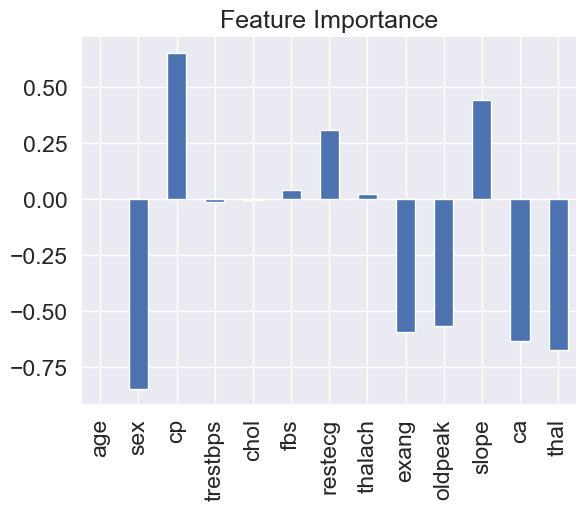

In [54]:
# Visualization
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar", title="Feature Importance", legend=False);

## Evaluation

Few things that could be done to reach evaluation target:
- Try other models (such as XGBoost)
- Increase the number of data in dataset
- Improve current models